In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
from matplotlib.patches import Rectangle

In [29]:
matplotlib.rcParams['figure.figsize'] = 40, 40
matplotlib.rcParams['figure.dpi'] = 150

In [26]:
img = Image.open("ifsa_logo_bag_design_crop.png")

img_a = np.array(img)

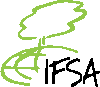

In [25]:
img

Define the functions

In [80]:
def plot_lines(line_n, before=5, after=5):
    fig, ax = plt.subplots(1,1)
    
    height, width, _ = img_a.shape
    
    #Plot a grid 
    for i in range(175):
        ax.axvline(i+.5, color='grey', alpha=.7, lw=.8)
    for i in range(0, before+after+1):
        ax.axhline(i+.5, color="grey", alpha=.7, lw=.8)
    
    
    l = height - line_n # need to invert image direction 
    top = max(l-after, 0)
    ax.imshow(img_a[top:l+before+1,:,])
    
    y_offset = 0 if top != 0 else l-after # needed to handle limit,
    ax.set_yticks(range(y_offset, before+after+1+y_offset))    
    locs,labels = plt.yticks()
    plt.yticks(locs, map(lambda x: (line_n+after+y_offset)-x, locs))
    ax.yaxis.set_tick_params(labelsize='large')
    
    ax.set_xticks(range(width+1));
    ax.xaxis.set_tick_params(rotation=90, labelsize='large')
    
    rect = Rectangle((0, after+y_offset-.5), width, 1, lw=2, color="red", fill=False)
    ax.add_patch(rect)
    
    ax.set_title(f"line n {line_n}")

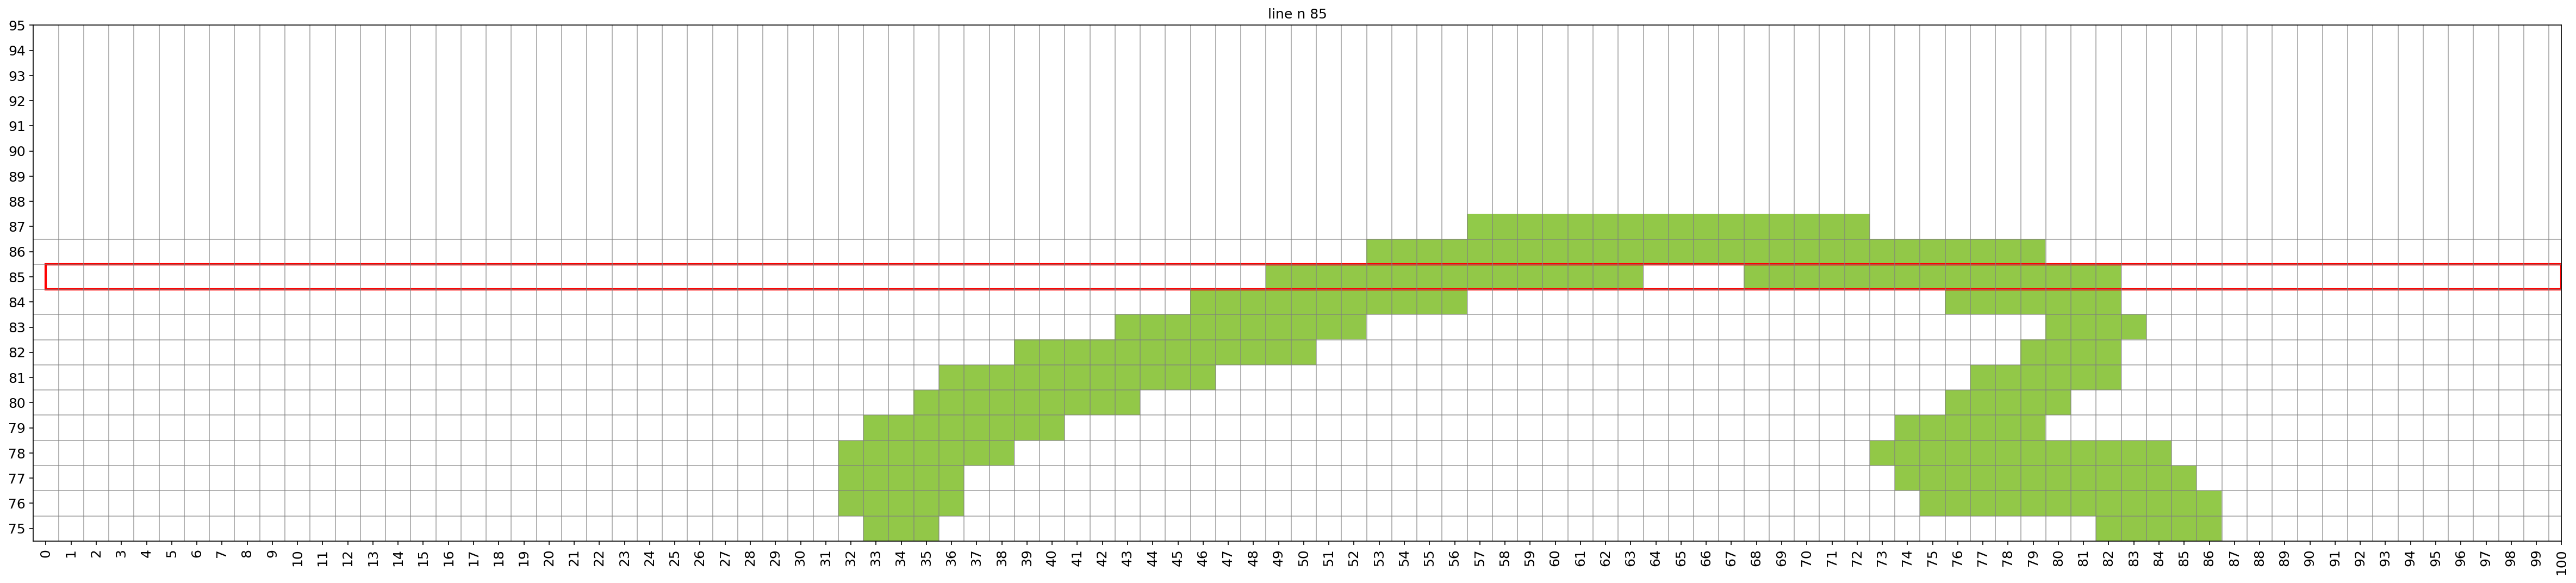

In [81]:
plot_lines(85, 10,10)

Run the interactive version

In [82]:
interact(plot_lines, line_n=range(img_a.shape[0] +1), before=range(15), after=range(25))

interactive(children=(Dropdown(description='line_n', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

<function __main__.plot_lines(line_n, before=5, after=5)>